In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


2024-12-19 12:49:33.088186: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-19 12:49:33.217691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734608973.272759     969 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734608973.288046     969 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 12:49:33.425655: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [68]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))

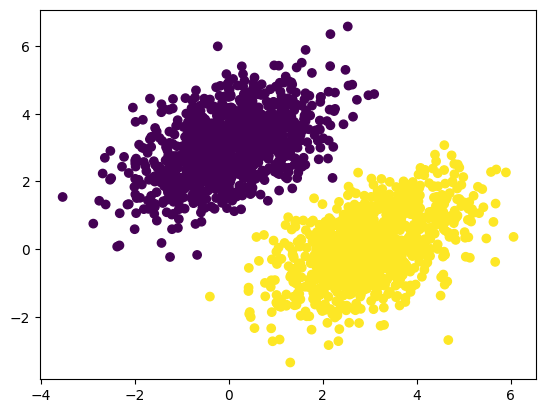

In [69]:
plt.scatter(inputs[:,0],inputs[:,1],c = targets[:,0])
plt.show()

In [70]:
#Dimensions:
input_dims = 2
output_dims = 1

# Inicialize weigths and bias variables.

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dims,output_dims)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dims,)))

In [12]:
# Definition of model functions
def model(inputs):
    return tf.matmul(inputs,W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)

    return tf.reduce_mean(per_sample_losses)

In [20]:
#Learning step

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tp:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    grad_loss_wrt_W, grad_loss_wrt_b = tp.gradient(loss,[W, b])

    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss


In [71]:
for step in range(60):
    loss = training_step(inputs,targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5438
Loss at step 1: 0.8700
Loss at step 2: 0.2509
Loss at step 3: 0.1605
Loss at step 4: 0.1398
Loss at step 5: 0.1289
Loss at step 6: 0.1200
Loss at step 7: 0.1120
Loss at step 8: 0.1046
Loss at step 9: 0.0979
Loss at step 10: 0.0918
Loss at step 11: 0.0861
Loss at step 12: 0.0810
Loss at step 13: 0.0762
Loss at step 14: 0.0719
Loss at step 15: 0.0679
Loss at step 16: 0.0643
Loss at step 17: 0.0610
Loss at step 18: 0.0580
Loss at step 19: 0.0552
Loss at step 20: 0.0526
Loss at step 21: 0.0503
Loss at step 22: 0.0481
Loss at step 23: 0.0462
Loss at step 24: 0.0444
Loss at step 25: 0.0427
Loss at step 26: 0.0412
Loss at step 27: 0.0399
Loss at step 28: 0.0386
Loss at step 29: 0.0374
Loss at step 30: 0.0364
Loss at step 31: 0.0354
Loss at step 32: 0.0345
Loss at step 33: 0.0337
Loss at step 34: 0.0330
Loss at step 35: 0.0323
Loss at step 36: 0.0316
Loss at step 37: 0.0311
Loss at step 38: 0.0306
Loss at step 39: 0.0301
Loss at step 40: 0.0296
Loss at step 41: 0.0292
Lo

<function matplotlib.pyplot.show(close=None, block=None)>

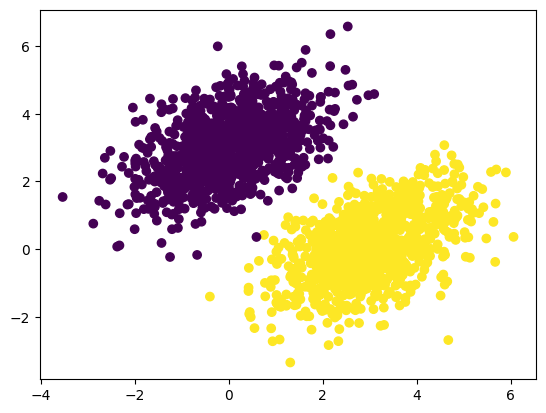

In [72]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

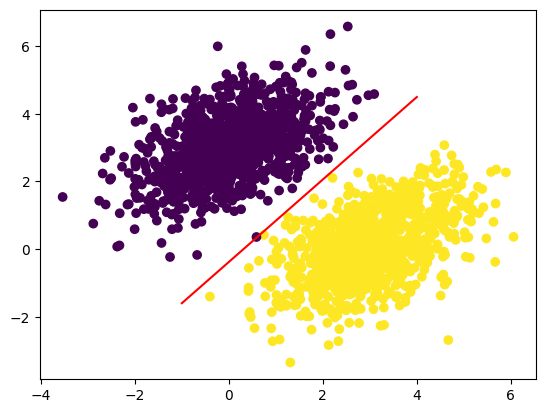

In [73]:
x = np.linspace(-1,4,100)
y = -W[0]/W[1]*x + (0.5-b)/W[1]

plt.plot(x,y,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show